Using COAsT to compute the Empirical Orthogonal Functions (EOFs) of your data.

## Load data and compute EOFs
Load packages and define some file paths

In [1]:
import coast
import xarray as xr
import matplotlib.pyplot as plt

fn_nemo_dat_t = './example_files/nemo_data_T_grid.nc'
fn_nemo_dom = './example_files/COAsT_example_NEMO_domain.nc'

Load data variables that are on the NEMO t-grid

In [2]:
nemo_t = coast.NEMO( fn_data = fn_nemo_dat_t, fn_domain = fn_nemo_dom, grid_ref = 't-grid', chunks={} )

For a variable (or subset of a variable) with two spatial dimensions and one temporal dimension, i.e. (x,y,t), the EOFs, temporal projections and variance explained can be computed by calling the ‘eofs’ method, and passing in the ssh DataArray as an argument. For example, for the sea surface height field, we can do

In [3]:
eof_data = coast.eofs( nemo_t.dataset.ssh )

The method returns an xarray dataset that contains the EOFs, temporal projections and variance as DataArrays

In [4]:
eof_data

<xarray.Dataset>
Dimensions:        (mode: 7, t_dim: 7, x_dim: 297, y_dim: 375)
Coordinates:
  * mode           (mode) int64 1 2 3 4 5 6 7
    longitude      (y_dim, x_dim) float32 -19.888672 -19.777344 ... 13.0
    latitude       (y_dim, x_dim) float32 40.066406 40.066406 ... 65.00098
    time           (t_dim) datetime64[ns] 2010-01-01T12:00:00 ... 2010-01-07T...
Dimensions without coordinates: t_dim, x_dim, y_dim
Data variables:
    EOF            (y_dim, x_dim, mode) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    temporal_proj  (t_dim, mode) float32 -2.2225099 -8.439405 ... 1.1452406e-06
    variance       (mode) float32 dask.array<chunksize=(7,), meta=np.ndarray>

The variance explained of the first four modes is

In [5]:
eof_data.variance.sel(mode=[1,2,3,4])

<xarray.DataArray 'variance' (mode: 4)>
dask.array<getitem, shape=(4,), dtype=float32, chunksize=(4,), chunktype=numpy.ndarray>
Coordinates:
  * mode     (mode) int64 1 2 3 4
Attributes:
    standard name:  percentage of variance explained

And the EOFs and temporal projections can be quick plotted:

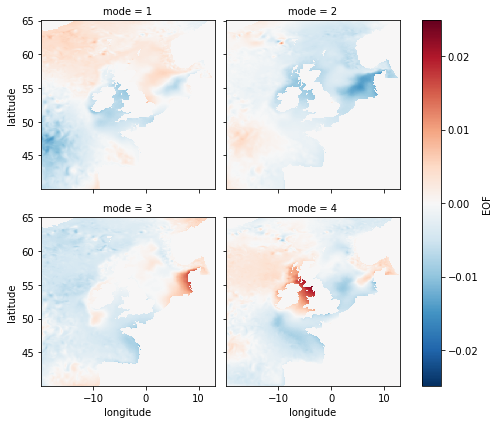

In [6]:
eof_data.EOF.sel(mode=[1,2,3,4]).plot.pcolormesh(col='mode',col_wrap=2,x='longitude',y='latitude')

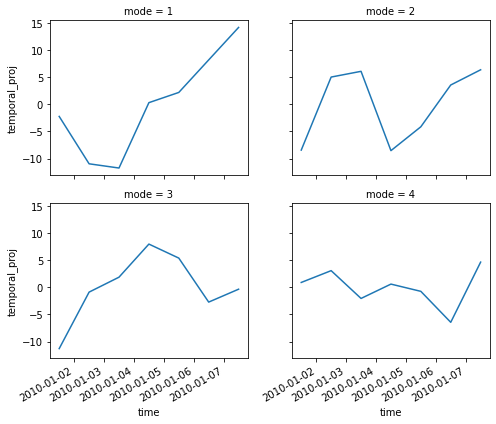

In [7]:
eof_data.temporal_proj.sel(mode=[1,2,3,4]).plot(col='mode',col_wrap=2,x='time')

The more exotic hilbert complex EOFs can also be computed to investigate the propagation of variability, for example:

In [8]:
heof_data = coast.hilbert_eofs( nemo_t.dataset.ssh )
heof_data

<xarray.Dataset>
Dimensions:         (mode: 7, t_dim: 7, x_dim: 297, y_dim: 375)
Coordinates:
  * mode            (mode) int64 1 2 3 4 5 6 7
    longitude       (y_dim, x_dim) float32 -19.888672 -19.777344 ... 13.0
    latitude        (y_dim, x_dim) float32 40.066406 40.066406 ... 65.00098
    time            (t_dim) datetime64[ns] 2010-01-01T12:00:00 ... 2010-01-07...
Dimensions without coordinates: t_dim, x_dim, y_dim
Data variables:
    EOF_amp         (y_dim, x_dim, mode) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EOF_phase       (y_dim, x_dim, mode) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    temporal_amp    (t_dim, mode) float64 18.39 9.522 ... 3.139e-15 5.476e-16
    temporal_phase  (t_dim, mode) float64 180.0 180.0 0.0 ... 94.42 -81.72 13.01
    variance        (mode) float64 57.99 27.12 14.88 ... 1.764e-30 2.486e-31

now with the modes expressed by their amplitude and phase, the spatial propagation of the variability can be examined through the EOF_phase.